In [3]:
import pandas as pd

# Cargar el archivo limpio
file_path = '../data/silver/ExporteCOL2023-2024_clean.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar la estructura
print(df.head())

# Resumen estadístico de las variables numéricas
print(df.describe())

    Año  Mes         Uen                Canal Comercial  Marquilla  \
0  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
1  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
2  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
3  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
4  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   

   Código Producto                                           Producto  \
0         10228785  LACA AZUL ESPANOL BRILLANTE AEROCOLOR AEROSOLE...   
1         10228835  LACA BLANCO MATE AEROCOLOR AEROSOLES 125031-80...   
2         10228920  LACA NEGRO BRILLANTE AEROCOLOR AEROSOLES 12500...   
3         10228936  LACA NEGRO MATE AEROCOLOR AEROSOLES 125012-801...   
4         10228976  LACA ROJO CLARO BRILLANTE AEROCOLOR AEROSOLES ...   

   Numérica Clientes  Numérica Documentos  Ventas Galones    Ventas  \
0                  1                    2        2.536998  265860.0  

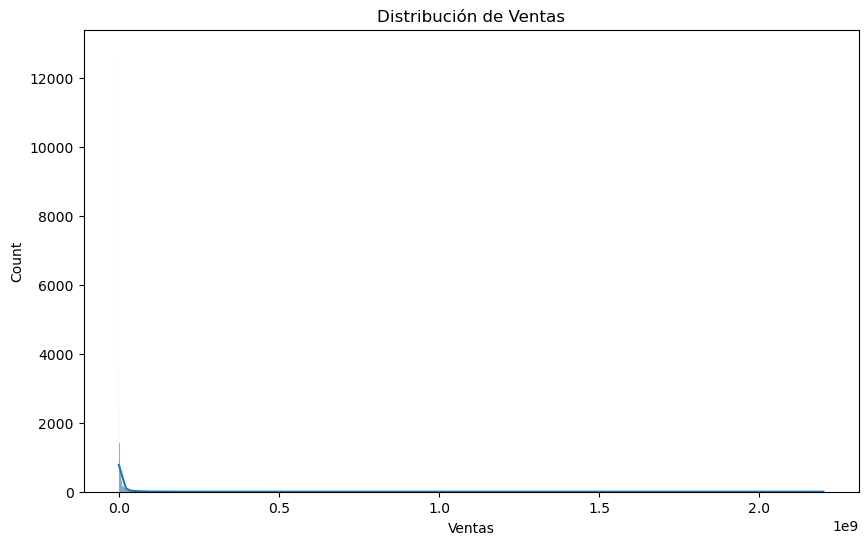

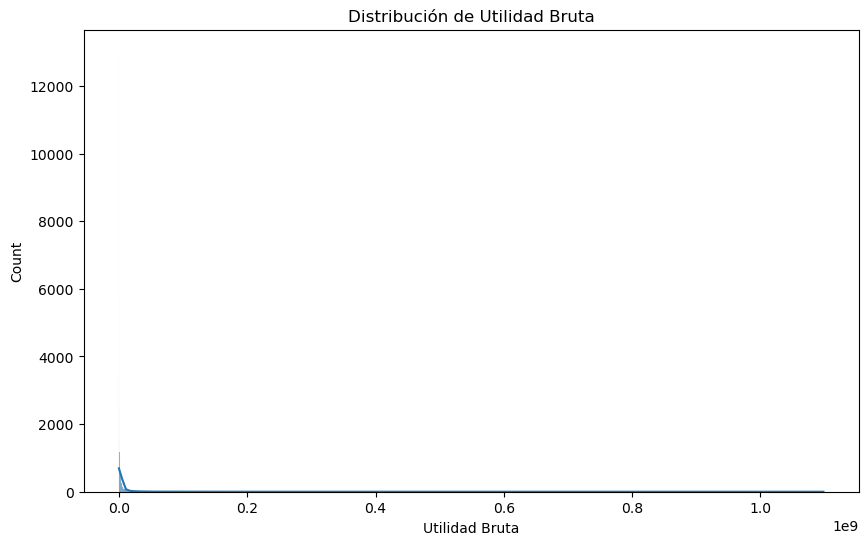

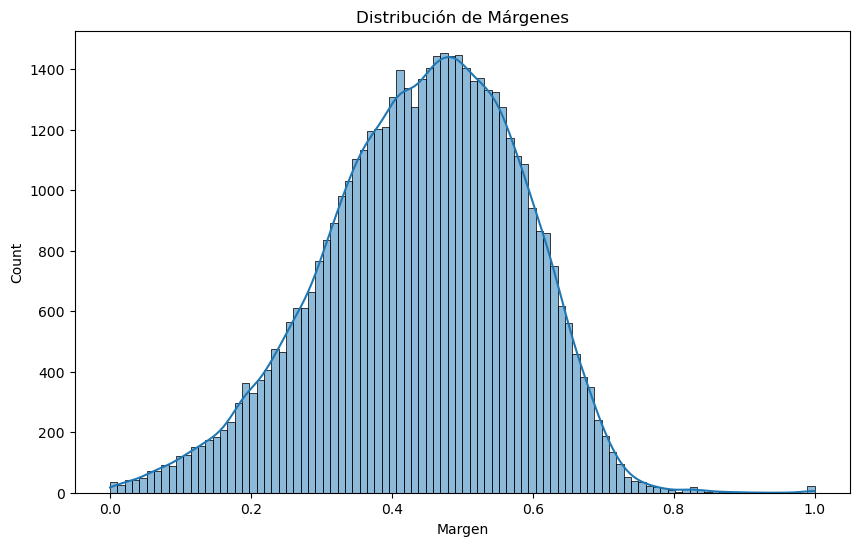

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de las ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['Ventas'], kde=True)
plt.title('Distribución de Ventas')
plt.show()

# Distribución de utilidad bruta
plt.figure(figsize=(10, 6))
sns.histplot(df['Utilidad Bruta'], kde=True)
plt.title('Distribución de Utilidad Bruta')
plt.show()

# Distribución de márgenes
plt.figure(figsize=(10, 6))
sns.histplot(df['Margen'], kde=True)
plt.title('Distribución de Márgenes')
plt.show()

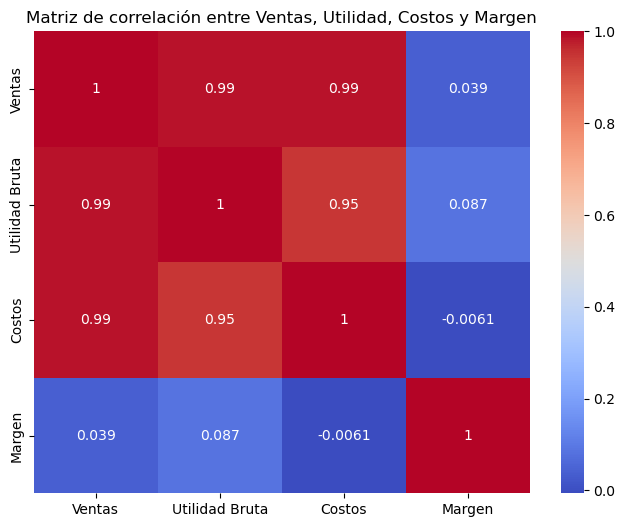

In [9]:
# Matriz de correlación
correlation_matrix = df[['Ventas', 'Utilidad Bruta', 'Costos', 'Margen']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre Ventas, Utilidad, Costos y Margen')
plt.show()

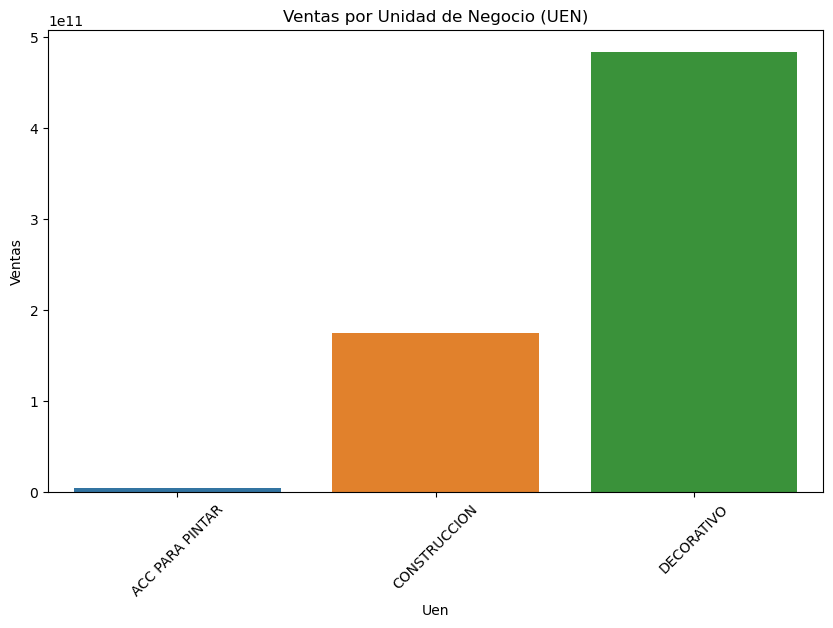

In [11]:
# Ventas por UEN
ventas_por_uen = df.groupby('Uen')['Ventas'].sum().reset_index()

# Visualización de las ventas por UEN
plt.figure(figsize=(10, 6))
sns.barplot(x='Uen', y='Ventas', data=ventas_por_uen)
plt.title('Ventas por Unidad de Negocio (UEN)')
plt.xticks(rotation=45)
plt.show()

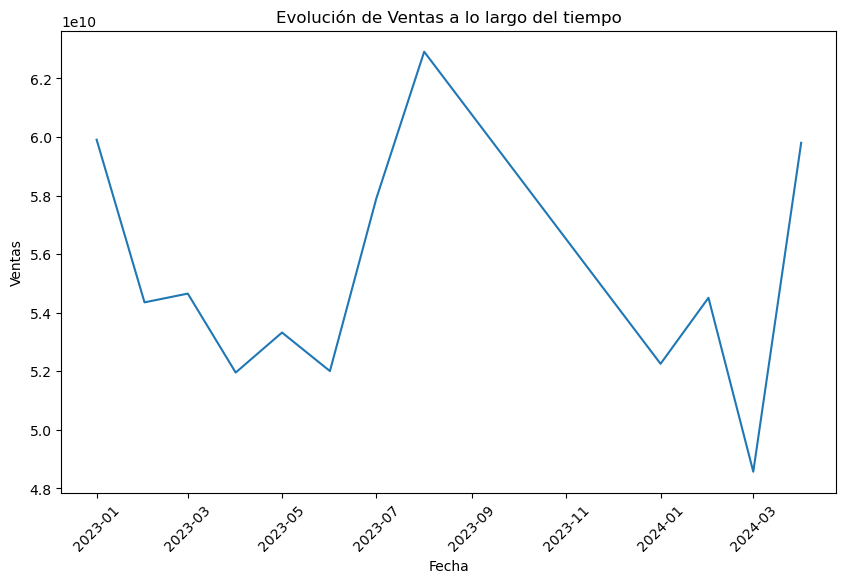

In [13]:
# Ventas por mes y año
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')
ventas_por_mes = df.groupby('Fecha')['Ventas'].sum().reset_index()

# Visualización de la evolución de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fecha', y='Ventas', data=ventas_por_mes)
plt.title('Evolución de Ventas a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()
